# Центральная предельная теорема и распределение Парето

   Целью настоящей работы является оценка распределения выборочного среднего случайной величины из распределения Парето при разных объёмах выборок. То есть, если есть случайная величина Х из практически любого распределения, а в данном случае из распределения Парето, и случайным образом из этого распределения сформирована выборка объемом N, то выборочное среднее, определенное на основании выборки можно приблизить нормальным распределением со средним значением, которое совпадает с математическим ожиданием исходной совокупности.

Распределение Парето имеет 2 параметра - $k$ и $m$. $m$ - это коэффициент масштаба. $k$ - это степенной коэффициент, характеризующий вероятность отклонения от порогового уровня.

Основные формулы распределения Парето
(взято из Википедии): https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE):

#### Функция плотности вероятности: $\frac{k}{m}(\frac{m}{x})^{k+1}$

#### Функция распределения: $1-(\frac{m}{x})^k$  

#### Математическое ожидание: $\frac{km}{k-1}$

#### Дисперсия: $(\frac{m}{k-1})^2\frac{k}{k-2}$   

#### Стандартное отклонение: $\sqrt{(\frac{m}{k-1})^2\frac{k}{k-2}}$

## 1. Импортируем необходимые библиотеки

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
%matplotlib inline
import pandas as pd
from math import exp, pi

## 2. Зададим параметры распределения

In [37]:
k = 5
# По умолчанию в scipy.stats.pareto параметр m равен 1 (scale). Менять его не будем.
mean_par = k*1/(k-1)
disp_par = (1/(k-1))**2*k/(k-2)
std_par = ((1/(k-1))**2*k/(k-2))**0.5

## 3. Напишем необходимые в дальнейшей работе функции

In [42]:
# Функция формирования выборки из 1000 случайных значений с входными параметрами:
# n - объем выборки (в дальнейшем будем присваивать ему значения 5, 15, 30, 50, 100, 300, 500, 1000)
# k - степенной кэффициент распределения Парето
# value - кол-во выборок
def choice (k, n, value):
    list_choice = []
    for i in range (value):
        r = sum(sts.pareto.rvs(k, size=n))/n
        list_choice.append(r)
    return list_choice


# Функция добавления новой строки в таблицу
def new_line (n, list_choice):
    
    # Обозначим название выборки
    ch_name = 'Объем выборки-' + str(n)
    
    # Рассчитаем параметры выборки
    ch_mean = round(np.mean(list_choice),4)
    ch_disp = round(np.var(list_choice),4)
    ch_std = round(np.std(list_choice),4)
    
    # Рассчитаем параметры соответствующего (выборке) нормального распределения.
    # Среднее значение равно математическому ожиданию исходного распределения
    # Дисперсия равна дисперсии исходного распределения, поделенной на объем выборки     
    mu = mean_par
    sigma_2 = (1/(k-1))**2*k/(k-2)/n
    sigma = (sigma_2)**0.5    
      
    # Внесем значения в таблицу
    new_line = {
                'Распределение': ch_name,
                'Мат.ожид.': ch_mean,
                'Дисп.': ch_disp,
                'Cт.откл.': ch_std,
                'Норм.мат.ожид': round(mu,4),
                'Норм.дисп.': round(sigma_2,4),
                'Норм.ст.откл.': round(sigma,4)                                           
                     }
    return new_line


# Функция для построения гистограммы выборочных средних 
# и теоретической плотности нормального распределения

def grafik (n, value):
    # Зададим описание графика
    title_gr = 'Объем выборки: ' + str(n)
    label_gr = 'Выборка ' + str(n)
    
    # Зададим масштаб графика
    fig = plt.figure()
    axes = fig.add_axes([0.1,0.1,1.9,0.8])

    # С помощью функции choice создадим массив переменных
    x = choice (k, n, value)

    # Построим гистограмму распределения
    axes.hist(x, density=True, bins = 'auto', alpha=0.6, label= label_gr)

    # Вычислим значения для определения теоритической плотности соответствующего (выборке) нормального распределения.
    # Среднее значение равно математическому ожиданию исходного распределения
    # Дисперсия равна дисперсии исходного распределения, поделенной на объем выборки 
    mu = mean_par
    sigma_2 = (1/(k-1))**2*k/(k-2)/n
    sigma = (sigma_2)**0.5

    # Построим теоретическую плотность нормального распределения
    r = sts.norm(mu, sigma)
    pdf = r.pdf(sorted(x))
    axes.plot(sorted(x), pdf, 'r-', lw=3, alpha=0.6, label='Theoretical pdf')

    # Подпишем оси и название
    axes.legend()
    axes.set_xbound(1,2)
    axes.set_ylabel('$f(x)$')
    axes.set_xlabel('$x$')
    axes.set_title(title_gr)
    


## 4. Построим график плотности распределения и гистограмму распределения

Text(0.5, 1.0, 'PDF ($Pareto$)')

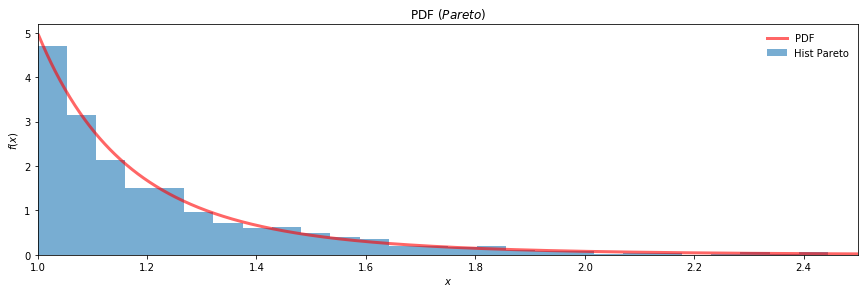

In [40]:
# Зададим масштаб графика
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1.9,0.8])

# Задаем массив значений переменной 
x = np.linspace(sts.pareto.ppf(0.01, k),
                sts.pareto.ppf(0.99, k), 1000)

# Построим теоретическую плотность распределения
rv = sts.pareto(k)
pdf = rv.pdf(x)
axes.plot(x, pdf, 'r-', lw=3, alpha=0.6, label="PDF")
axes.legend()

# Сделаем выборку из 1000 элементов для построения гистограммы
r_gist = sts.pareto.rvs(k, size=1000)

# Построим гистограмму распределения
axes.hist(r_gist, density=True, bins = 'auto', alpha=0.6, label="Hist Pareto")
axes.legend(loc='best', frameon=False)

# Подпишем оси и название
axes.set_xlim(1,2.5)
axes.set_ylabel('$f(x)$')
axes.set_xlabel('$x$')
axes.set_title("PDF ($Pareto$)")

## 5. Создадим таблицу параметров

In [41]:
# Создаем пустую таблицу
# Значения параметров, полученные при расчете аппроксимирующего нормального распредения будем записывать в:
# Норм.мат.ожид - математическое ожидание нормального распределения
# Норм.дисп. - дисперсия нормального распределения
# Норм.ст.откл. - стандартное отклонение нормального распределения

frame = pd.DataFrame({'Распределение': 'NaN', 
                      'Мат.ожид.':'NaN', 
                      'Дисп.': 'NaN',
                      'Cт.откл.': 'NaN',
                      'Норм.мат.ожид': '-',
                      'Норм.дисп.': '-',
                      'Норм.ст.откл.':'-'                                           
                     }, index=[0,1])



# Наполняем таблицу значениями исходного распределения и выборки для гистограммы

# Название распределения
frame.iloc[[0], [0]] = 'Исходное'
frame.iloc[[1], [0]] = 'Объем выборки-1000'

# Математическое ожидание
frame.iloc[[0], [1]] = round(mean_par,4)
frame.iloc[[1], [1]] = round(np.mean(r_gist),4)

# Дисперсия
frame.iloc[[0], [2]] = round(disp_par,4)
frame.iloc[[1], [2]] = round(np.var(r_gist),4)

# Стандартное отклонение
frame.iloc[[0], [3]] = round(std_par,4)
frame.iloc[[1], [3]] = round(np.std(r_gist),4)

# Отключим перенос столбцов на следующую строку и выведем на печать
pd.options.display.expand_frame_repr = False
print(frame)

        Распределение Мат.ожид.   Дисп. Cт.откл. Норм.мат.ожид Норм.дисп. Норм.ст.откл.
0            Исходное      1.25  0.1042   0.3227             -          -             -
1  Объем выборки-1000    1.2549  0.1317    0.363             -          -             -


## 6. Построим графики для выборок разного объема: 

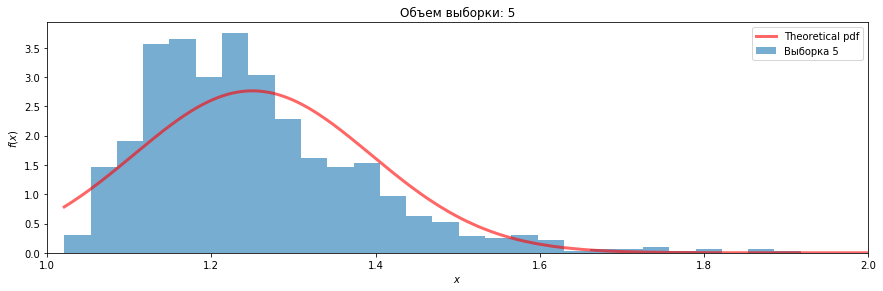

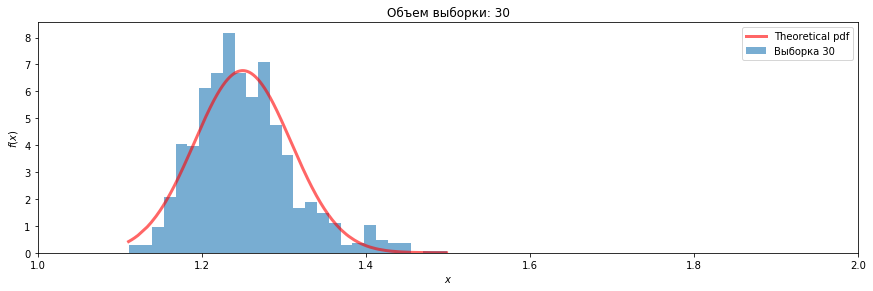

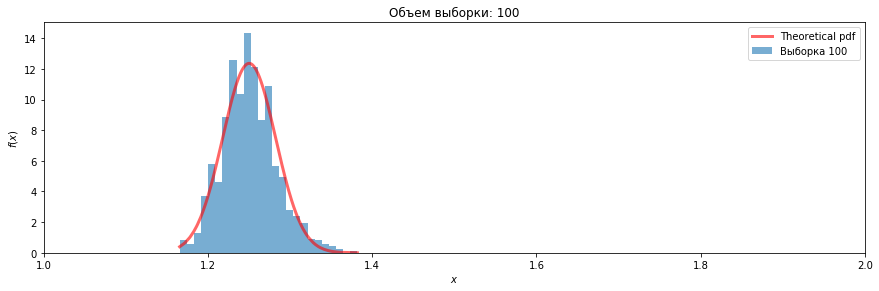

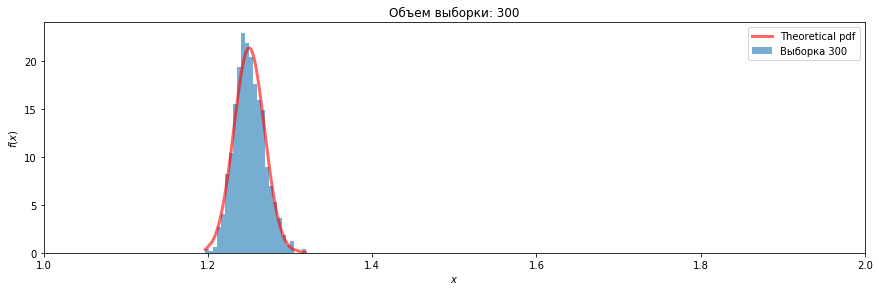

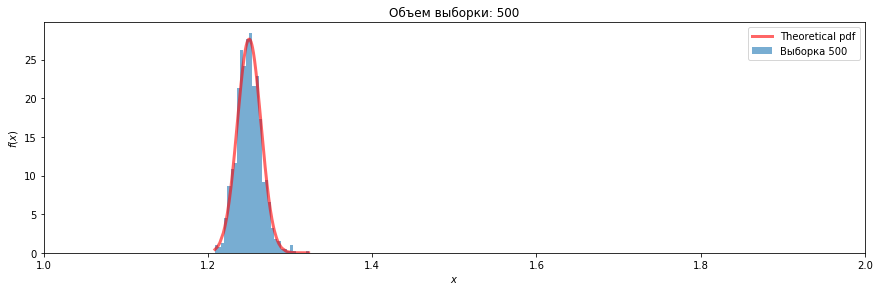

In [43]:
# Создадим список объема выборок
n_mean = [5,30,100,300,500]

# Заведем переменную количества выборок
value = 1000

# Построим графике с помощью цикла, вызвав ранее созданную функцию
for i in n_mean:
    grafik (i, value)


## 7. Заполним таблицу расчетными значениями параметров распределения

In [44]:
# Заполним через цикл, используя ранее заведенные значения переменных 
for n in n_mean:
    list_choice_frame = choice (k, n, value)
    new_line_frame = new_line (n, list_choice_frame)
    frame = frame.append(new_line_frame, ignore_index=True)

# Отключим перенос столбцов на следующую строку и выведем на печать
pd.options.display.expand_frame_repr = False
print(frame)

        Распределение Мат.ожид.   Дисп. Cт.откл. Норм.мат.ожид Норм.дисп. Норм.ст.откл.
0            Исходное      1.25  0.1042   0.3227             -          -             -
1  Объем выборки-1000    1.2549  0.1317    0.363             -          -             -
2     Объем выборки-5    1.2534  0.0197   0.1405          1.25     0.0208        0.1443
3    Объем выборки-30    1.2513  0.0036   0.0599          1.25     0.0035        0.0589
4   Объем выборки-100    1.2487   0.001   0.0321          1.25      0.001        0.0323
5   Объем выборки-300    1.2498  0.0003   0.0179          1.25     0.0003        0.0186
6   Объем выборки-500    1.2492  0.0002   0.0142          1.25     0.0002        0.0144


## 8. Выводы

Ориентируясь на графики и сводные данные в таблице можно сделать следующие выводы:

1. Расчетное математическое ожидание всех выборок, начиная от самой меньшей, находится в пределах математического ожидания исходного распределения. Отклонение не превышает 1%.
2. При увеличении объема выборок (параметра n) дисперсия стремительно убывает. И уже при выборке объема 30 можно наблюдать достаточно высокую точность аппроксимации распределения выборочных средних нормальным распределением.
3. В результате проведенного исследования можно с уверенностью сказать, что центральная пределельная теорема верна для распределения Парето, не смотря на то, что это распределение далеко от нормального распределения и имеет ограничение по минимальному значению переменной. 